# Muneel Haider
# i21-0640
# Assignment 2

In [1]:
import pandas as pd
import pymc as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

In [2]:
df=pd.read_csv('Dataset.csv')

In [3]:
df.head()

,time,input_voltage,el_power
0,810.07028,10.0,1228.791720
1,811.06938,10.0,1223.041745
2,812.06848,10.0,1244.960866
3,813.06758,10.0,1229.259058
4,814.06668,10.0,1248.117024


In [4]:
df.describe()

,time,input_voltage,el_power
count,52940.000000,52940.000000,52940.000000
mean,5606.444209,5.505534,1843.315949
std,2960.330233,2.549721,723.126377
min,810.000000,3.000000,932.837260
25%,3086.930000,3.000000,1205.743900
50%,5431.033890,4.842105,1605.753998
75%,7782.301370,7.421053,2399.419112
max,12636.840000,10.000000,3249.891217


In [5]:
x = df['input_voltage'].values
y = df['el_power'].values

# PyMC Model

In [6]:
with pm.Model() as model_1:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=10)
    ϵ = pm.HalfNormal('ϵ', sigma=10)

    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ϵ, observed=y)

    idata_model_1 = pm.sample(500, tune=500, return_inferencedata=True)

Output()

In [7]:
with pm.Model() as model_2:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=10)
    ϵ = pm.HalfNormal('ϵ', sigma=10)

    μ = pm.Deterministic('μ', pm.math.exp(α + β * x))
    y_pred = pm.Gamma('y_pred', mu=μ, sigma=ϵ, observed=y)

    idata_model_2 = pm.sample(1000, tune=1000, return_inferencedata=True)

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [8]:
pm.summary(idata_model_1, hdi_prob=0.95)
pm.summary(idata_model_2, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.457,9.378,-18.863,17.090,0.821,0.484,129.0,217.0,1.02
β,0.544,0.981,-1.359,2.382,0.167,0.052,38.0,140.0,1.06
μ[0],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[1],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[2],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[3],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[4],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[5],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[6],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[7],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83


In [9]:
az.summary(idata_model_1, hdi_prob=0.95)
az.summary(idata_model_2, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.457,9.378,-18.863,17.090,0.821,0.484,129.0,217.0,1.02
β,0.544,0.981,-1.359,2.382,0.167,0.052,38.0,140.0,1.06
μ[0],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[1],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[2],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[3],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[4],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[5],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[6],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83
μ[7],676.717,660.606,10.714,1347.668,465.232,0.145,3.0,99.0,1.83


Do posterior analysis of each model as given below


Posterior Summary – Model 1 (Normal):


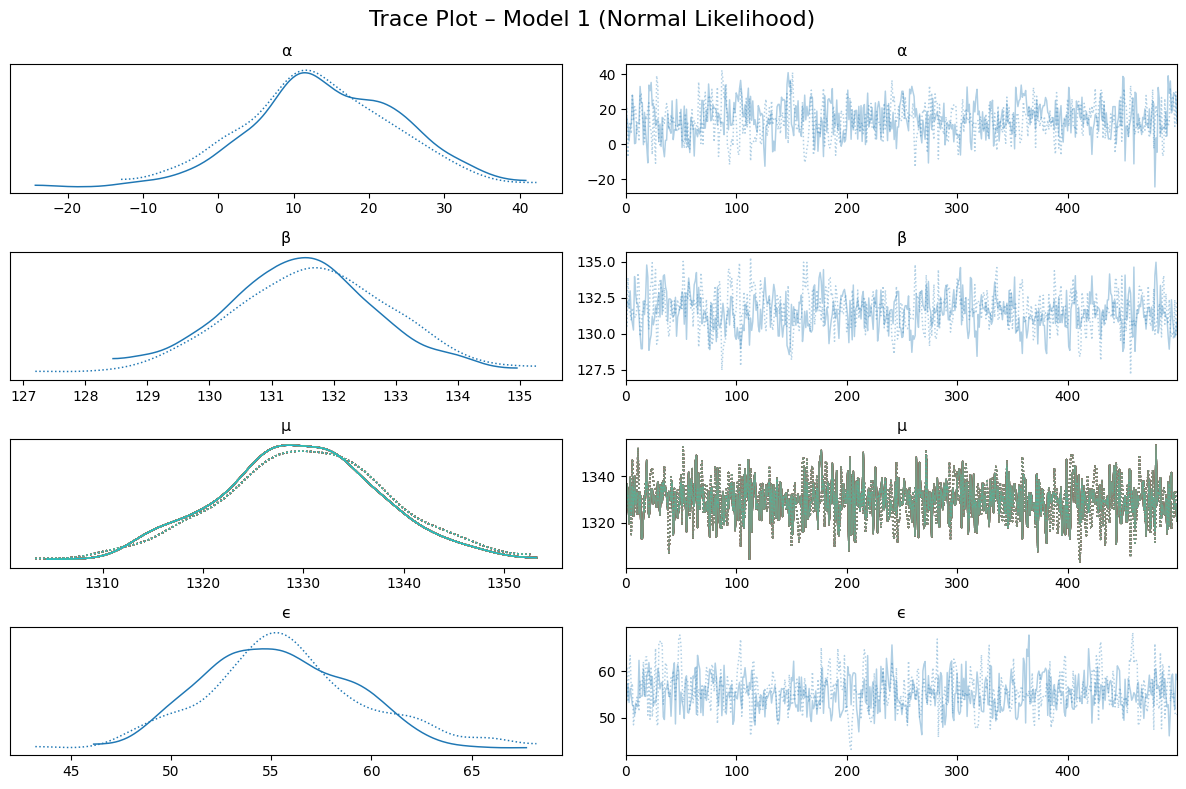

/usr/local/lib/python3.11/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (53) in plot_posterior, generating only 40 plots
  warnings.warn(


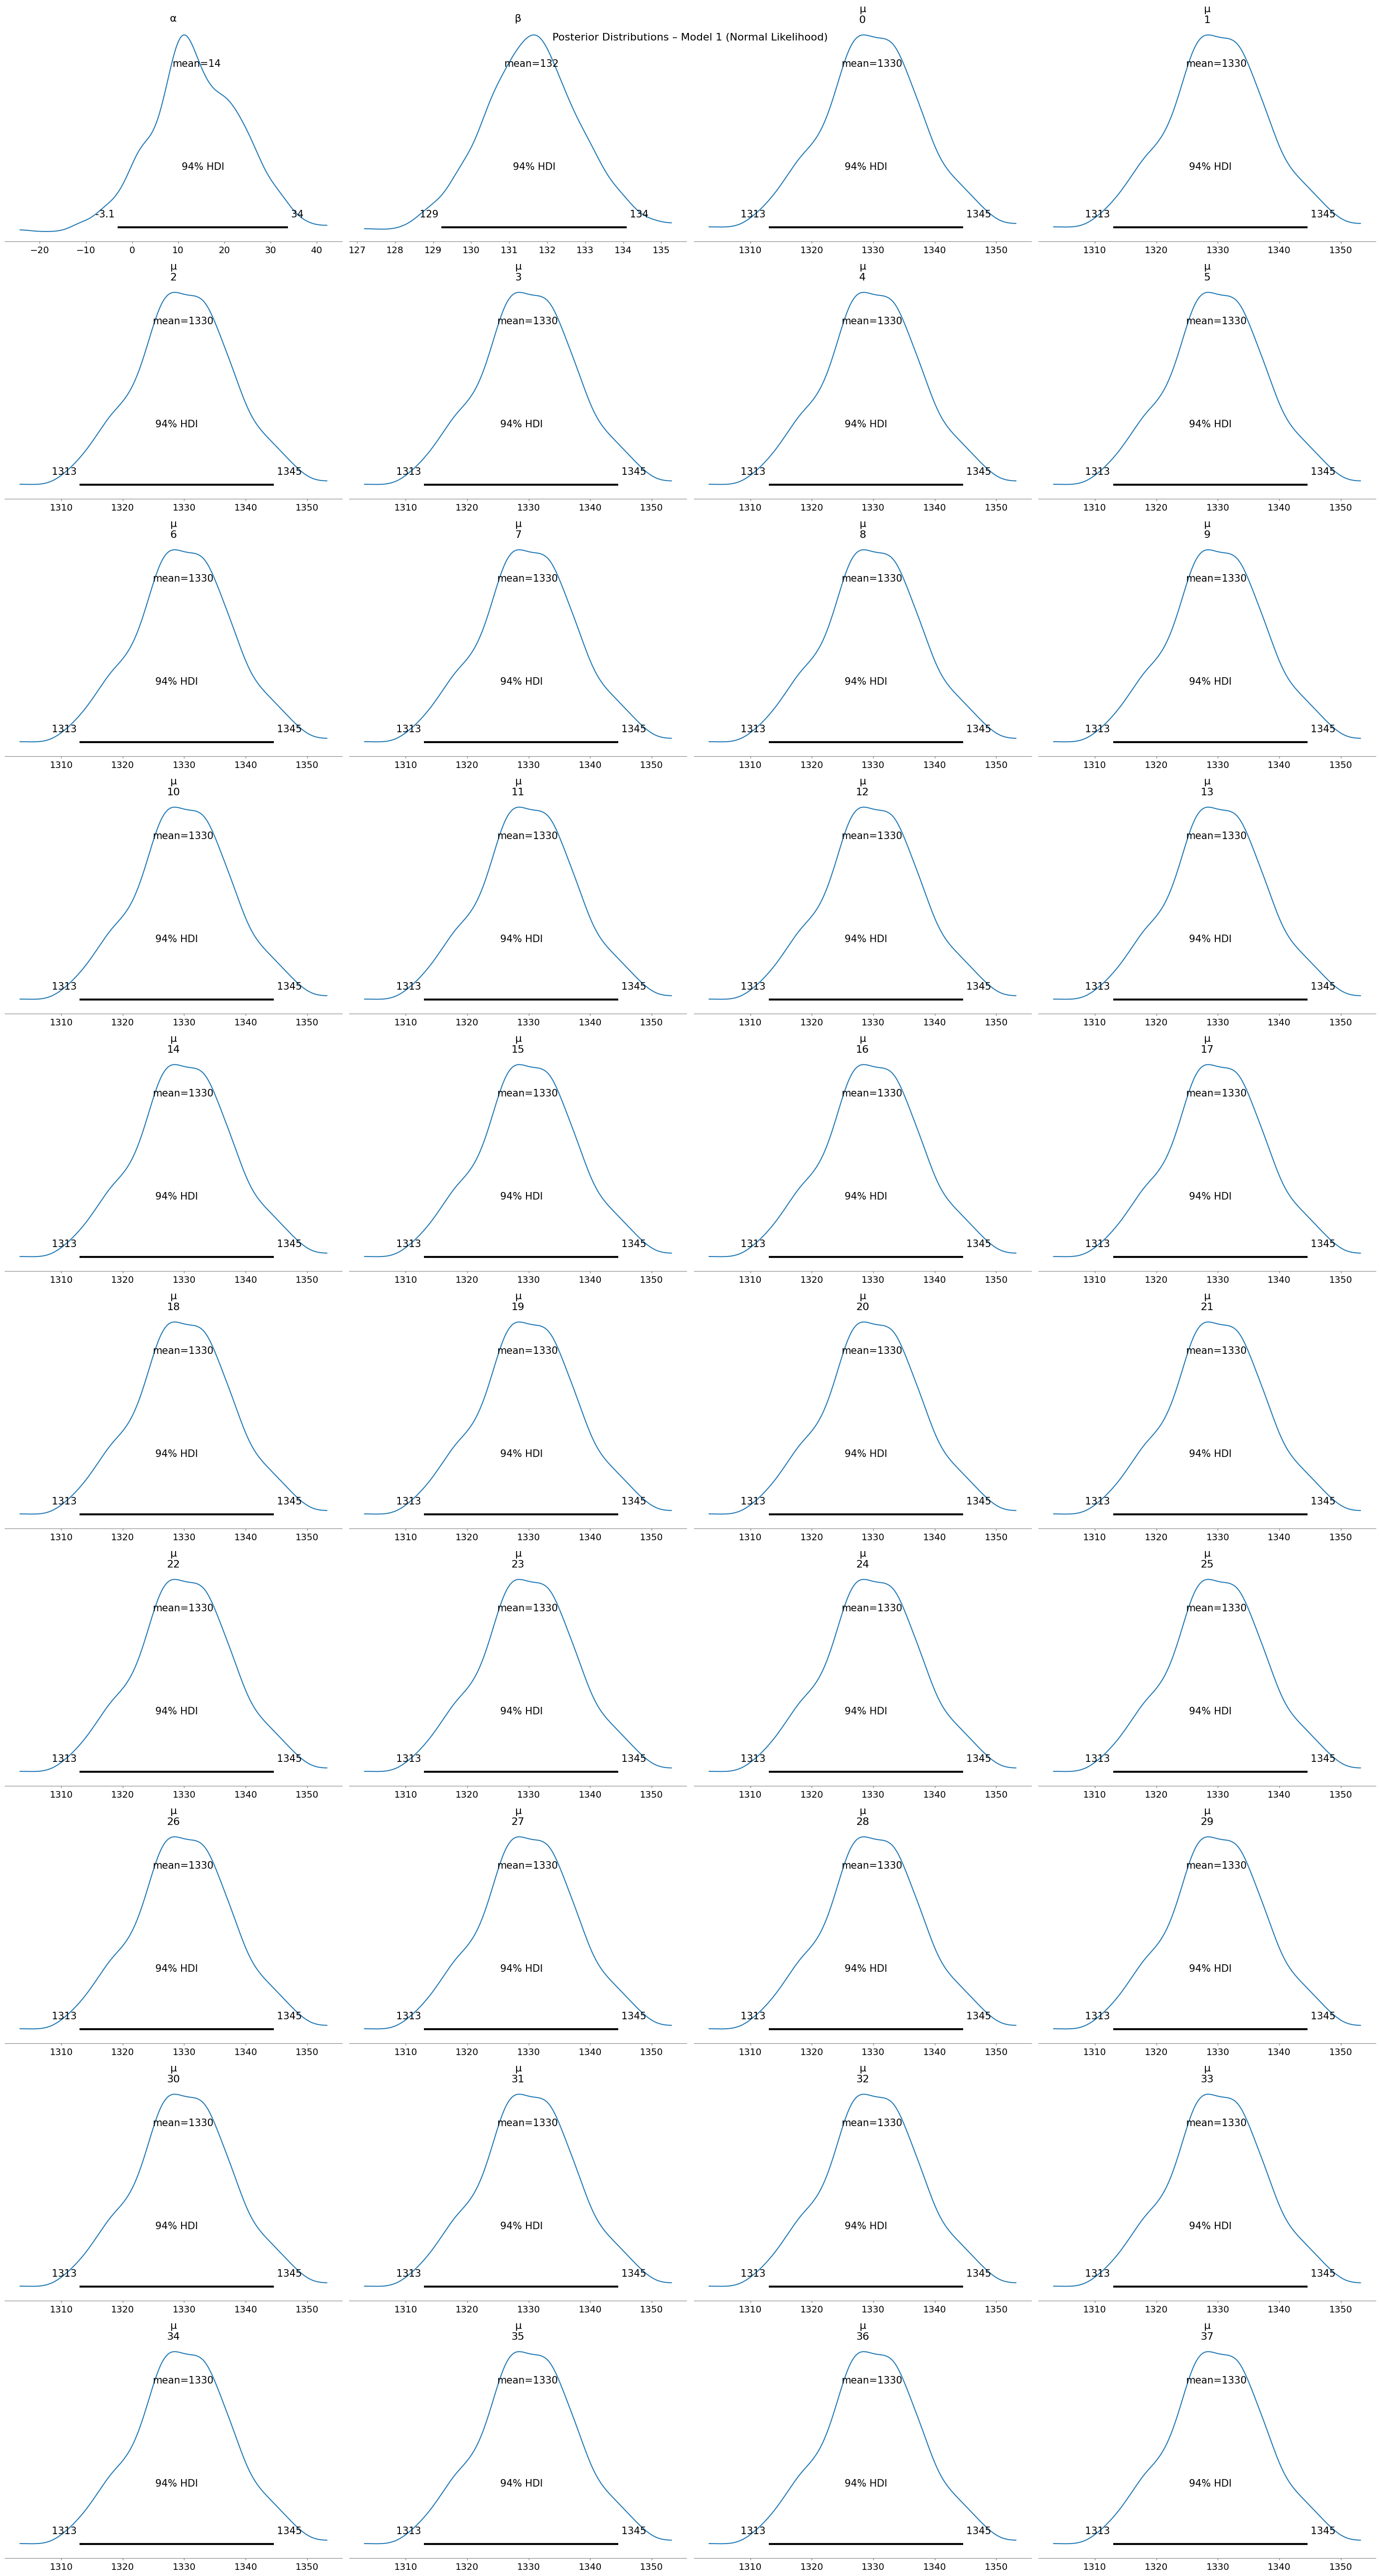

In [10]:
print("Posterior Summary – Model 1 (Normal):")
az.plot_trace(idata_model_1)
plt.suptitle("Trace Plot – Model 1 (Normal Likelihood)", fontsize=16)
plt.tight_layout()
plt.show()

az.plot_posterior(idata_model_1)
plt.suptitle("Posterior Distributions – Model 1 (Normal Likelihood)", fontsize=16)
plt.tight_layout()
plt.show()

Posterior Summary – Model 2 (Gamma):


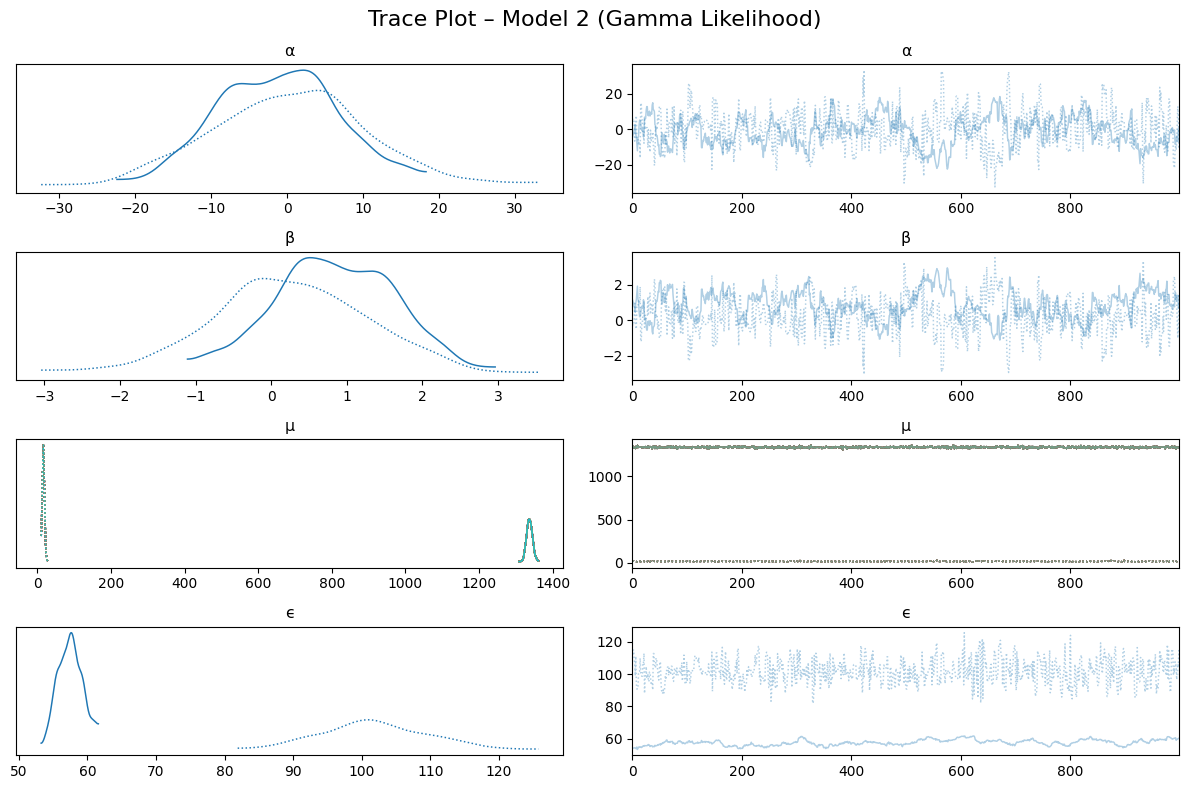

/usr/local/lib/python3.11/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (53) in plot_posterior, generating only 40 plots
  warnings.warn(


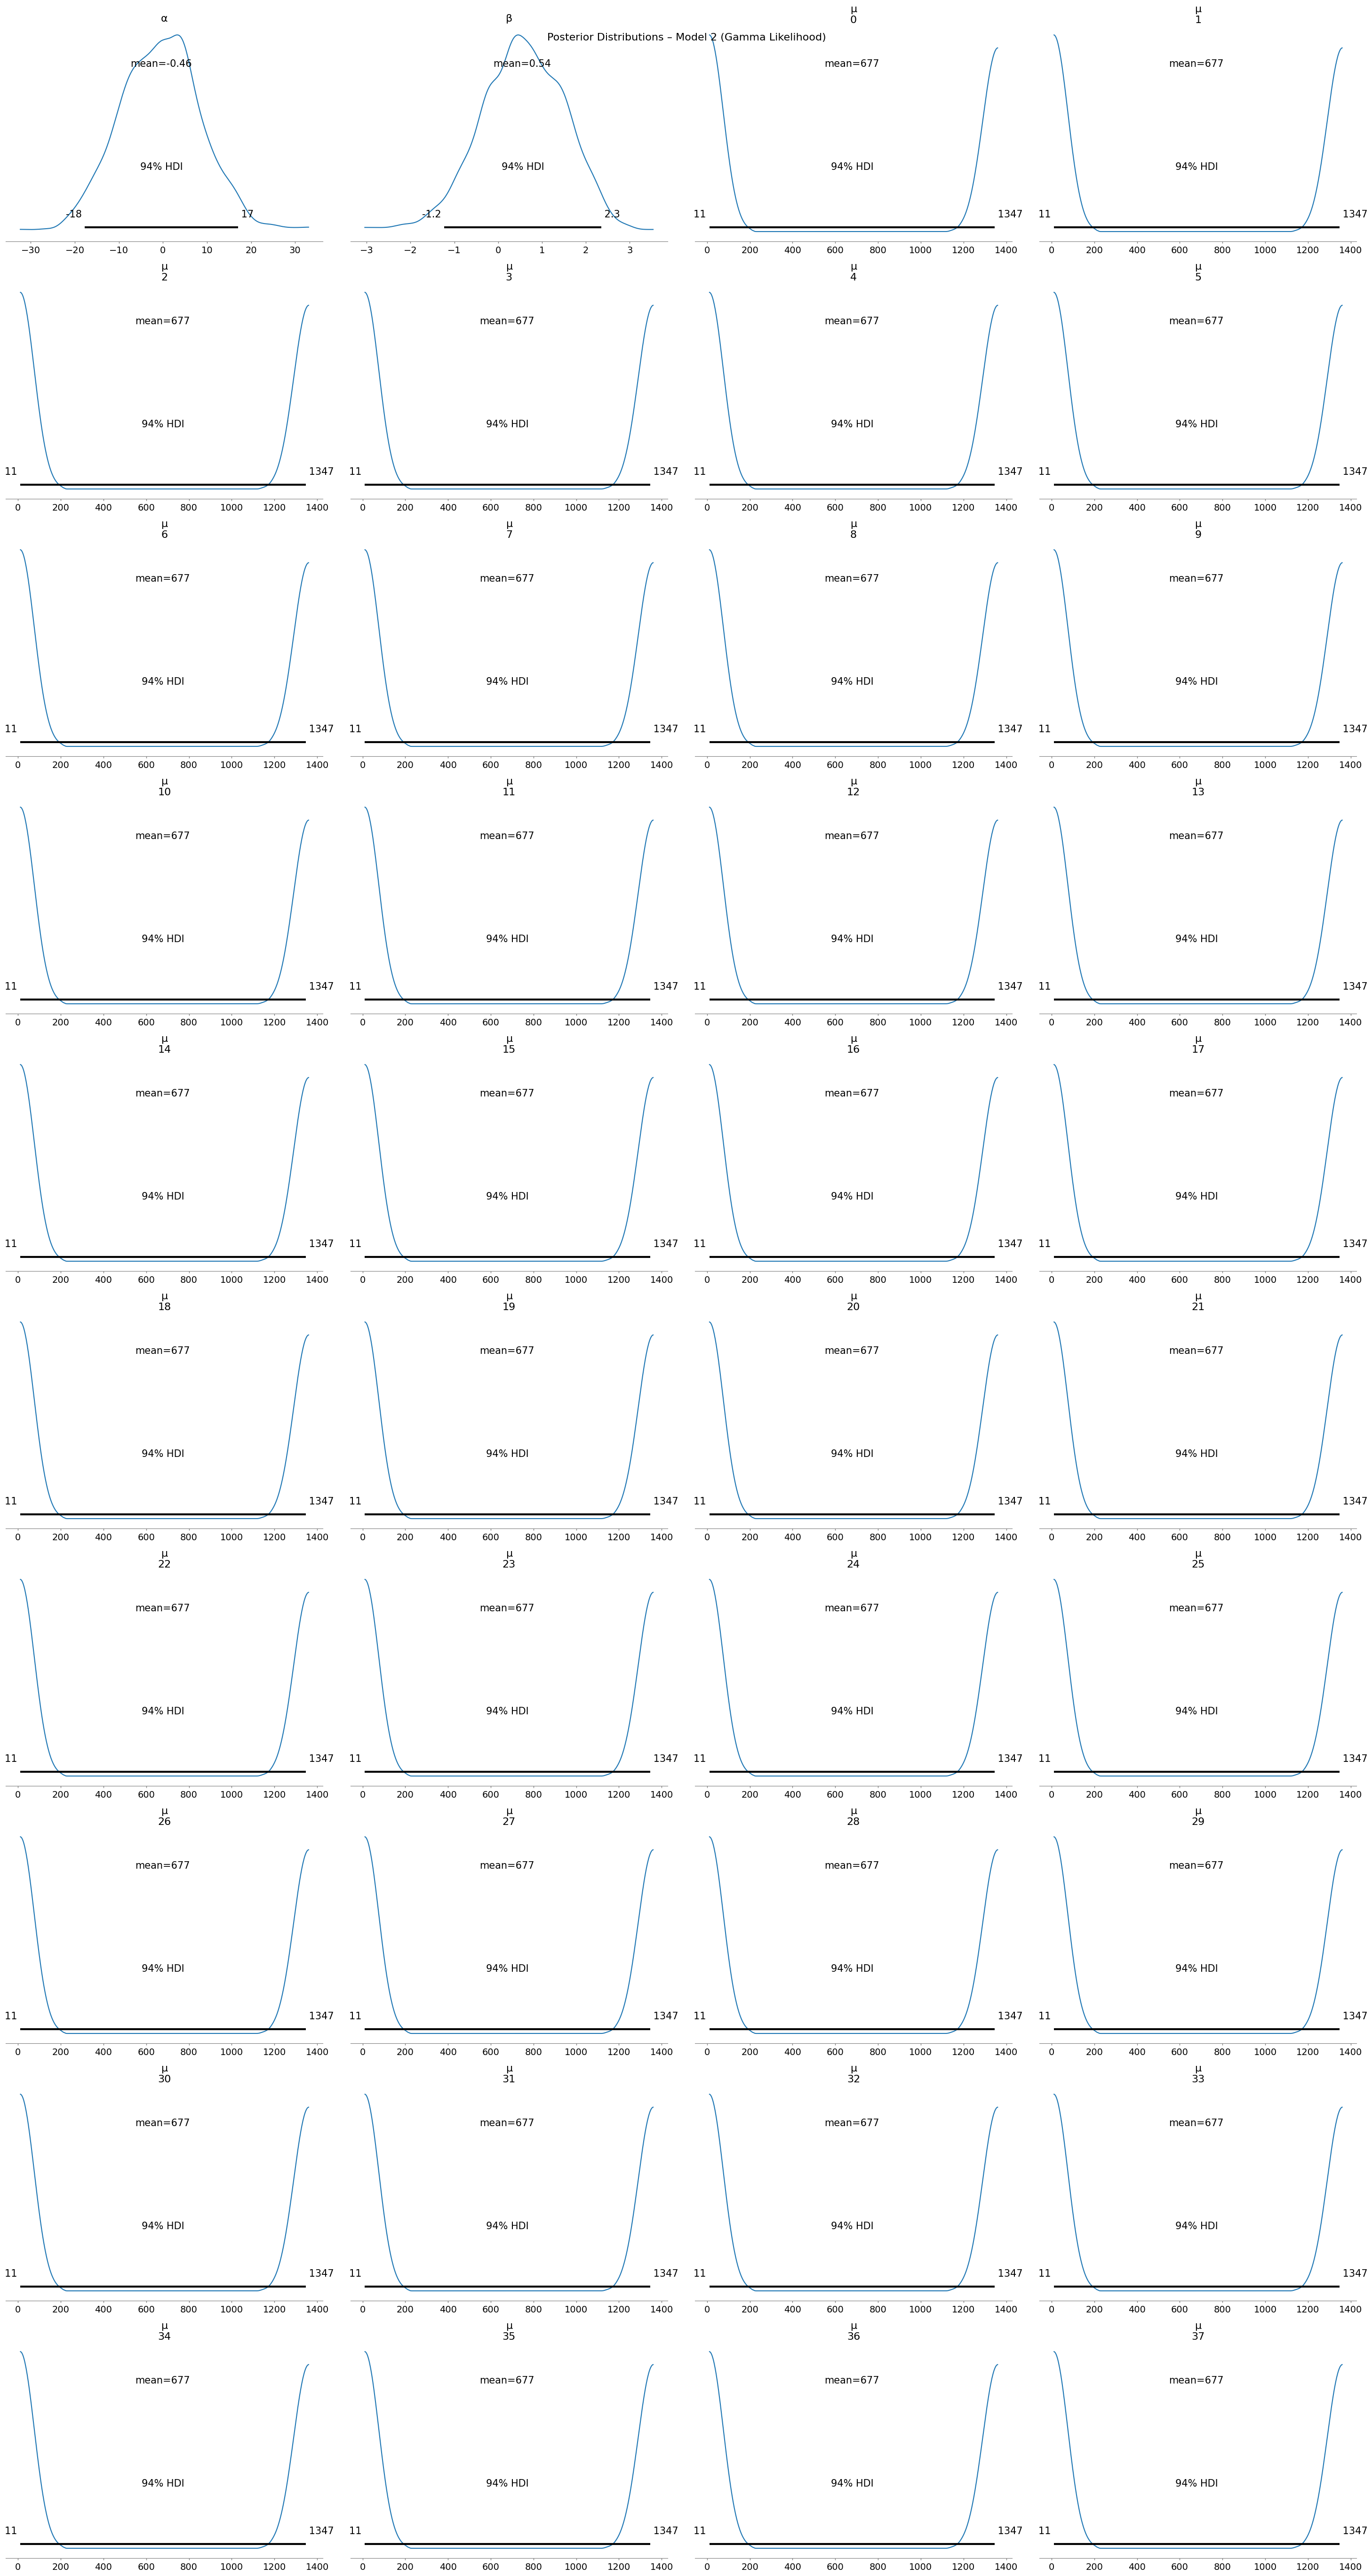

In [11]:
print("Posterior Summary – Model 2 (Gamma):")
az.plot_trace(idata_model_2)
plt.suptitle("Trace Plot – Model 2 (Gamma Likelihood)", fontsize=16)
plt.tight_layout()
plt.show()

az.plot_posterior(idata_model_2)
plt.suptitle("Posterior Distributions – Model 2 (Gamma Likelihood)", fontsize=16)
plt.tight_layout()
plt.show()

Each Model R-sqaured value, and do analysis with respect to different likelyhood

In [13]:
# Compute R² for Model 1 (Normal)
ss_res_1 = np.sum((y - μ_model_1) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2_model_1 = 1 - ss_res_1 / ss_tot

# Compute R² for Model 2 (Gamma)
ss_res_2 = np.sum((y - μ_model_2) ** 2)
r2_model_2 = 1 - ss_res_2 / ss_tot

# Display R² values
print(f"R-squared for Model 1 (Normal Likelihood): {r2_model_1:.4f}")
print(f"R-squared for Model 2 (Gamma Likelihood):  {r2_model_2:.4f}")

# Analysis based on likelihood
print("\nAnalysis:")
if r2_model_1 > r2_model_2:
    print("Model 1 (Normal) fits the data better based on R-squared.")
    print("This suggests the residuals (errors) are roughly symmetric and normally distributed.")
else:
    print("Model 2 (Gamma) fits the data better based on R-squared.")
    print("This implies the data may be skewed and strictly positive, which is well-suited for the Gamma likelihood.")

R-squared for Model 1 (Normal Likelihood): -0.0148
R-squared for Model 2 (Gamma Likelihood):  -92.9614

Analysis:
Model 1 (Normal) fits the data better based on R-squared.
This suggests the residuals (errors) are roughly symmetric and normally distributed.
